# TP0: Introducción a Python para DSP

Este trabajo práctico tiene como objetivo familiarizarte con la generación y análisis básico de señales usando **Python puro**, **NumPy** y **SciPy**.

## Objetivos
1. Definir funciones para generar señales básicas en Python puro (sin bibliotecas externas).
2. Generar señales usando bibliotecas como **NumPy** y **SciPy**.
3. Comprender la diferencia entre listas y arrays, y el beneficio del vectorizado.
4. Practicar operaciones básicas: encontrar máximos y mínimos en señales.


## Ejercicio 1: Señal cuadrada en Python puro

**Tarea:** Crea una función que genere una señal cuadrada de longitud `N` con los primeros `k` valores en `0` y los siguientes `k` en `1`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la señal como una lista.
- Muestra la lista y grafícala usando `matplotlib`.


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


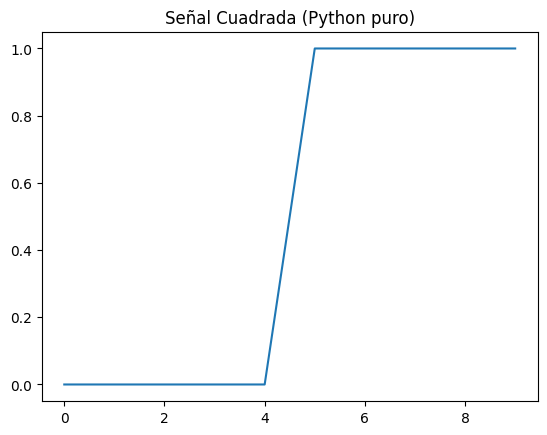

In [10]:
import matplotlib.pyplot as plt

def generar_senal_cuadrada(N, k):
    senial = []
    for i in range(k):
        senial.append(0)
    for i in range(k):
        senial.append(1)
    return senial

senal_cuad = generar_senal_cuadrada(10, 5)
print(senal_cuad)
plt.title('Señal Cuadrada (Python puro)')
plt.plot(senal_cuad)
plt.show()

## Ejercicio 2: Señal triangular en Python puro

**Tarea:** Crea una función que genere una señal triangular que suba desde `0` hasta `M` y luego baje a `0`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la lista y grafícala.


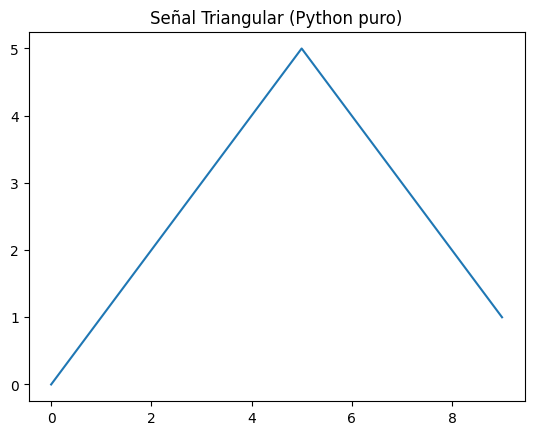

In [11]:
def generar_senal_triangular(M):
    senial = []
    for i in range(M):
        senial.append(i)
    for i in range(M, 0, -1):
        senial.append(i)
    return senial

senal_tria = generar_senal_triangular(5)
plt.title('Señal Triangular (Python puro)')
plt.plot(senal_tria)
plt.show()

## Ejercicio 3: Delta de Dirac en Python puro

**Tarea:** Implementa la función `generar_delta_dirac(longitud, posicion)` que devuelve una lista de ceros con un único `1` en la posición indicada.

**Prueba la función** para `longitud = 10` y `posición = 5`.


In [12]:
def generar_delta_dirac(cantidad, pos):
    if pos >= cantidad:
        return 'Error: posición fuera de rango'
    delta = [0]*cantidad
    delta[pos] = 1
    return delta

print(generar_delta_dirac(10,5))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


## Ejercicio 4: Generación con NumPy/SciPy

Repite los ejercicios anteriores usando **NumPy/SciPy** y grafíca las señales junto con su **base de tiempo** (`t`) generada con `np.linspace()` o `np.arange()`.

**Pregunta:** ¿Cuál es la diferencia entre usar `linspace` y `arange`?

Si bien ambos se pueden utilizar para generar un array Numpy de elementos equidistantes, "linspace" genera el espaciado automaticamente, dándole como parámetros el valor inicial, el final, y la cantidad de elementos total del array. Por otro lado, "arange" se le otorga el valor incial y el final, pero se especifica el espaciado entre estos mediante el tercer parámetro.
El resultado final es el mismo, un array Numpy de elementos equidistantes.

**Pistas:**
- Señal cuadrada: `sig.square()`.
- Señal senoidal: `np.sin()`.
- Señal triangular: `sig.sawtooth()`
- Señal delta de dirac: `np.dirac()` (o `np.concatenate()` con `zeros` y `ones`).


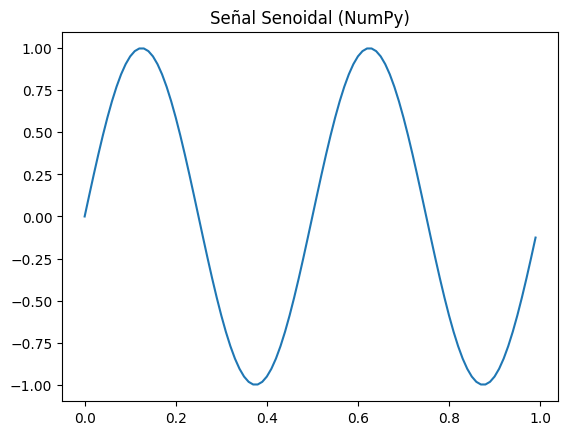

In [13]:
import numpy as np

# Señal senoidal con NumPy
frec = 2
f_muestreo = 100
t = np.arange(0, 1, 1/f_muestreo)
senal_seno = np.sin(2 * np.pi * frec * t)

plt.title('Señal Senoidal (NumPy)')
plt.plot(t, senal_seno)
plt.show()

## Ejemplo: Señal cuadrada con `scipy.signal`


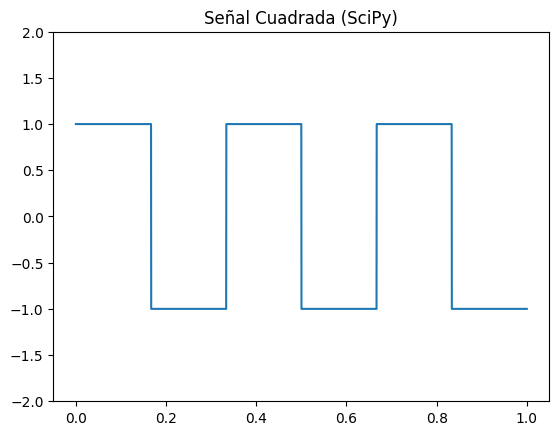

<class 'numpy.ndarray'>


In [21]:
import scipy.signal as sig

frec_muestreo = 5000
frec_senial = 3
t = np.arange(0,1,1/frec_muestreo)
senal_cuadrada_scipy = sig.square(2 * np.pi * frec_senial * t)

plt.title('Señal Cuadrada (SciPy)')
plt.plot(t, senal_cuadrada_scipy)
plt.ylim(-2, 2)
plt.show()

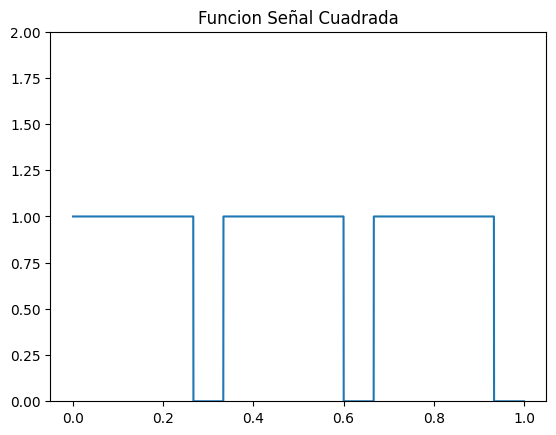

In [15]:
def cuadrada_func(fs, f, duty):
    t = np.arange(0,1,1/fs)
    s = sig.square(2 * np.pi * f * t, duty)
    s += 1
    s = s/2
    return (t,s)

signal = cuadrada_func(5000, 3, 0.8)
plt.title('Funcion Señal Cuadrada')
plt.plot(signal[0], signal[1])
plt.ylim(0, 2)
plt.show()


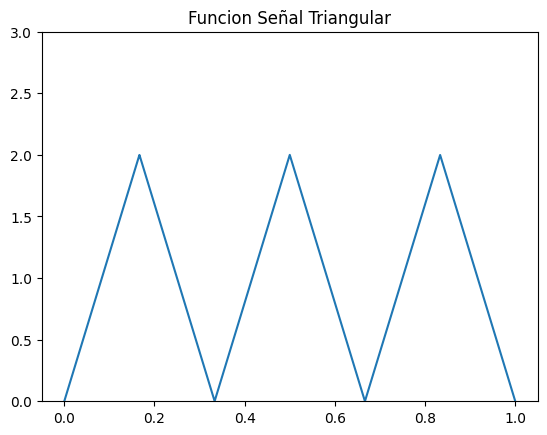

In [16]:
def saw_func(fs, f, Amp):
    t = np.arange(0,1,1/fs)
    s = sig.sawtooth(2 * np.pi * t * f, 0.5)
    s = (s + 1)/2
    s = s * Amp
    return (t,s)

signal = saw_func(5000, 3, 2)

plt.title('Funcion Señal Triangular')
plt.plot(signal[0], signal[1])
plt.ylim(0, 3)
plt.show()

In [17]:
s_d = sig.unit_impulse(10,5)

print(s_d)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Ejercicio 6: Máximos y mínimos

Encuentra el valor máximo y mínimo de una señal y sus posiciones:

- Primero con Python puro (listas y bucles).
- Luego con NumPy (`np.max`, `np.min`, `np.argmax`, `np.argmin`).


99.99492984149899 5038 0.0010351964892629795 899
99.99492984149899 5038 0.0010351964892629795 899


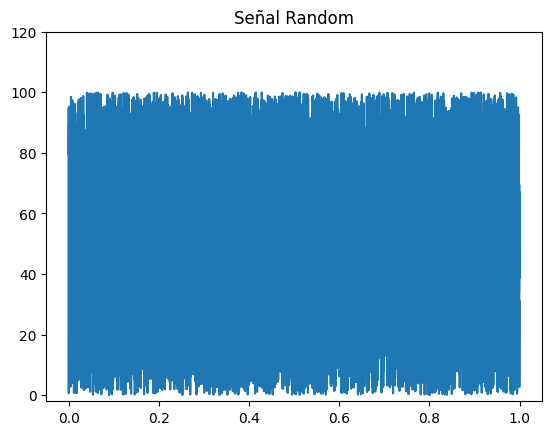

In [18]:
import random as rm

fs = 10000
f1 = 1000
t = np.arange(0,1,1/fs)
s = np.ones(fs)
for i in range(0, fs):
    s[i] = s[i] * 100 * rm.random()

# Sin NumPy
p_max = s[0]
p_min = s[0]
i_max = 0
i_min = 0
for i in range(0, len(s)):
    if s[i] > p_max:
        p_max = s[i]
        i_max = i
    elif s[i] < p_min:
        p_min = s[i]
        i_min = i
        
print(p_max, i_max, p_min, i_min)

# Con NumPy
p_max = np.max(s)
i_max = np.argmax(s)
p_min = np.min(s)
i_min = np.argmin(s)

print(p_max, i_max, p_min, i_min)


plt.title('Señal Random')
plt.plot(t, s)
plt.ylim(-2, 120)
plt.show()